**Predict House Price from Images**

***Ladino Álvarez Ricardo Arturo.***


In [6]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from keras import Model

### **Data precios casas**



In [7]:
## Base Casas = House_Base $$$$

Base=pd.read_csv("datos_casas/socal2.csv") 
House_Base=Base.copy()
print("Forma de los datos", House_Base.shape)
House_Base.head()

Forma de los datos (15474, 8)


,image_id,street,citi,n_citi,bed,bath,sqft,price
0,0,1317 Van Buren Avenue,"Salton City, CA",317,3,2.0,1560,201900
1,1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500
2,2,2304 Clark Road,"Imperial, CA",152,3,1.0,800,273950
3,3,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082,350000
4,4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100


In [8]:
X_House_Base=House_Base[['n_citi','bed','bath','sqft','price']]
print("Forma de los datos numéricos", X_House_Base.shape)
X_House_Base.head()

Forma de los datos numéricos (15474, 5)


,n_citi,bed,bath,sqft,price
0,317,3,2.0,1560,201900
1,48,3,2.0,713,228500
2,152,3,1.0,800,273950
3,48,3,1.0,1082,350000
4,55,4,3.0,2547,385100


### **Data imagenes casas**

Forma de los datos (311, 415, 3)


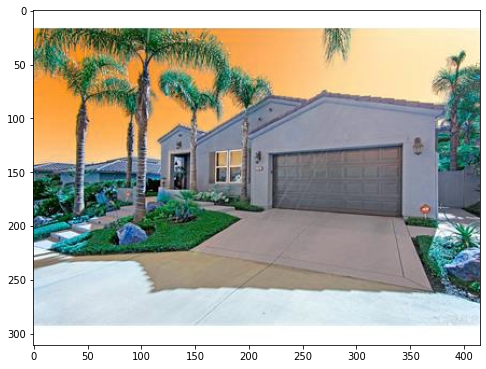

In [10]:
## Base imagenes de casas

muestra =cv2.imread('datos_casas/socal2/socal_pics/10796.jpg')
print("Forma de los datos", muestra.shape)
plt.figure(figsize=(8, 8))
plt.imshow(muestra)

#### **Resize de las imagenes**

- Se observo en algunas imágenes que la forma del tensor no es la misma, se tomo la decisión de cambiar el tamaño a un estándar.

Forma de los datos (77, 103, 3)


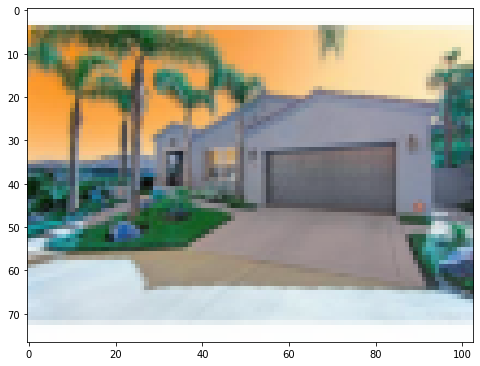

In [11]:
##Prueba para reducción - selección pixel size

base_resized = resize(muestra, (muestra.shape[0] // 4, muestra.shape[1] // 4),
                       anti_aliasing=True) 
plt.figure(figsize=(8, 8))
print("Forma de los datos", base_resized.shape)
plt.imshow(base_resized)
plt.show()

### **Tensor de imagenes**

In [12]:
### Resize en todo el conjunto de imagenes.

### Se crea el tensor de imagenes.

### Se normalizan las imagenes

num_img=0
images_path='datos_casas/socal2/socal_pics/'
House_img=np.zeros((15474,64, 64, 3),dtype='uint32')
for i in range(15474):
  sample=cv2.imread(images_path+'/'+str(i)+'.jpg')
  imgs=cv2.resize(sample,(64, 64))
  House_img[num_img]=imgs
  num_img+=1

House_img = House_img / 255

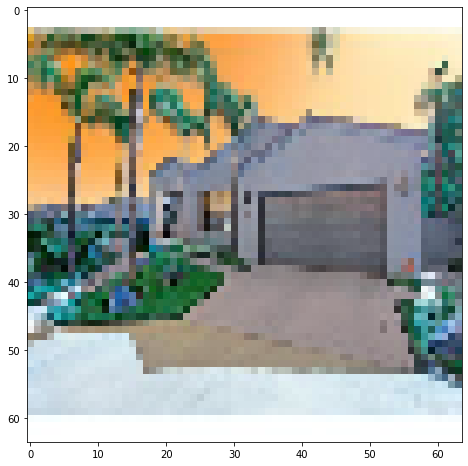

In [14]:
## Extracción y reconstrucción de imagenes tensor.

Recon = House_img[10796]
plt.figure(figsize=(8, 8))
plt.imshow(Recon)

In [16]:
#### De Train se ha sacado elementos para la validación.

X1_trn = X1_train[0:7736]
X1_val =  X1_train[7736:12379]

X2_trn = X2_train[0:7736]
X2_val =  X2_train[7736:12379]

y_tran = y_train[0:7736]
y_val =  y_train[7736:12379]


#### Dataset final Train , Validation , Test

print("\n House_Base Train X :", X1_trn.shape) #### Espacio construido de la casa: entrenamiento 
print("\n House_Base Val X :", X1_val.shape) #### Espacio construido de la casa: validación
print("\n House_Base Test X :", X1_test.shape) #### Espacio construido de la casa: prueba


print("\n House_img Train X :", X2_trn.shape) #### Imagenes de la casa: entrenamiento
print("\n House_Base Val X :", X2_val.shape) #### Imagenes de la casa: validación 
print("\n House_img Test X :", X2_test.shape) #### Imagenes de la casa: prueba


print("\n House_price Train label:", y_tran.shape) #### Precio de la casa: entrenamiento
print("\n House_price Val label:", y_val.shape) #### Precio de la casa: validación
print("\n House_price Test label:", y_test.shape) #### Precio de la casa: prueba



 House_Base Train X : (7736, 4)

 House_Base Val X : (4643, 4)

 House_Base Test X : (3095, 4)

 House_img Train X : (7736, 64, 64, 3)

 House_Base Val X : (4643, 64, 64, 3)

 House_img Test X : (3095, 64, 64, 3)

 House_price Train label: (7736,)

 House_price Val label: (4643,)

 House_price Test label: (3095,)


## Artificial Neural Network (ANN)

In [17]:
### Artificial Neural Network (ANN) --- SE QUEDA BIEN

ladi_ann=models.Sequential()
ladi_ann.add(layers.Dense(256,  input_dim= X1_trn.shape[1], activation='relu'))
ladi_ann.add(layers.Dropout(.5))
ladi_ann.add(layers.Dense(512, activation='relu'))
ladi_ann.add(layers.Dropout(.5))
ladi_ann.add(layers.Dense(128, activation='relu'))
ladi_ann.add(layers.Dropout(0.25))
ladi_ann.add(layers.Dense(8, activation='relu'))


In [91]:
ladi_ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1280      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 1

## **Convolutional Neural Network (CNN)**

In [18]:
#### Convolutional Neural Network (CNN) - Ladino 02 

ladi_cnn = models.Sequential()
ladi_cnn.add(layers.Input(shape=(64, 64, 3)))  # Entrada
ladi_cnn.add(layers.Conv2D(16, kernel_size=(3,3), strides=(1,1), padding='same')) #"2D"
ladi_cnn.add(layers.BatchNormalization())  # norma
ladi_cnn.add(layers.Activation("relu"))  #activation
ladi_cnn.add(layers.MaxPool2D(pool_size=(2,2)))  ## polng

ladi_cnn.add(layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same')) 
ladi_cnn.add(layers.BatchNormalization())  # norma
ladi_cnn.add(layers.Activation("relu"))  #activation
ladi_cnn.add(layers.MaxPool2D(pool_size=(2,2)))
ladi_cnn.add(layers.Dropout(0.25))

ladi_cnn.add(layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same')) 
ladi_cnn.add(layers.BatchNormalization())  # norma
ladi_cnn.add(layers.Activation("relu"))  #activation
ladi_cnn.add(layers.MaxPool2D(pool_size=(2,2)))
ladi_cnn.add(layers.Dropout(0.25))

ladi_cnn.add(layers.Flatten())
ladi_cnn.add(layers.Dense(32))
ladi_cnn.add(layers.BatchNormalization())
ladi_cnn.add(layers.Activation("relu"))
ladi_cnn.add(layers.Dropout(0.5))

ladi_cnn.add(layers.Dense(16))
ladi_cnn.add(layers.BatchNormalization())
ladi_cnn.add(layers.Activation("relu"))
ladi_cnn.add(layers.Dropout(0.5))

ladi_cnn.add(layers.Dense(8))
ladi_cnn.add(layers.BatchNormalization())
ladi_cnn.add(layers.Activation("relu"))



In [92]:
ladi_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)       

## **Concatenación**

In [19]:
### Arquitectura 01 - ladi_cnn


## Concatenación

combinedInput = layers.concatenate([ladi_ann.output, ladi_cnn.output])

Ladino_House_model  = layers.Dense(4, activation="relu")(combinedInput)
Ladino_House_model = layers.Dense(1, activation="linear")(Ladino_House_model) ## Cambiar lineal

Ladi_House= Model(inputs=[ladi_ann.input, ladi_cnn.input], outputs=Ladino_House_model)

In [ ]:
### Arquitectura CNN - Diagrama

plot_model(Ladi_House, to_file='modelo_uso.png', show_shapes=True, show_layer_names=False)

In [20]:
### Arquitectura 01 - ladi_cnn - Ladi_House

opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)


Ladi_House.compile(loss = 'mean_squared_error',  metrics =[metrics.mae] ,optimizer=opt)




history = Ladi_House.fit(x=[X1_trn,X2_trn], y=y_tran,validation_data=([X1_val, X2_val], y_val),epochs=100, batch_size=128)



Epoch 1/100
61/61 [==============================] - 2s 26ms/step - loss: 637455630336.0000 - mean_absolute_error: 703312.6875 - val_loss: 626659295232.0000 - val_mean_absolute_error: 699502.6250
Epoch 2/100
61/61 [==============================] - 1s 19ms/step - loss: 622568210432.0000 - mean_absolute_error: 692922.8125 - val_loss: 569308610560.0000 - val_mean_absolute_error: 658240.8750
Epoch 3/100
61/61 [==============================] - 1s 18ms/step - loss: 396357763072.0000 - mean_absolute_error: 502507.3125 - val_loss: 152447352832.0000 - val_mean_absolute_error: 270278.9062
Epoch 4/100
61/61 [==============================] - 1s 19ms/step - loss: 135630692352.0000 - mean_absolute_error: 275093.4688 - val_loss: 125718142976.0000 - val_mean_absolute_error: 260402.5625
Epoch 5/100
61/61 [==============================] - 1s 18ms/step - loss: 130434310144.0000 - mean_absolute_error: 269396.2500 - val_loss: 123040194560.0000 - val_mean_absolute_error: 258995.6875
Epoch 6/100
61/61 [=

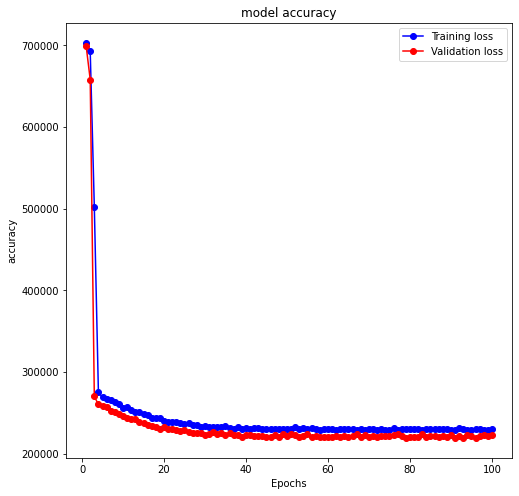

In [94]:
plt.figure(figsize=(8, 8))
history_dict = history.history
loss_values = history_dict['mean_absolute_error']
val_loss_values = history_dict['val_mean_absolute_error']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo-', label='Training loss')
plt.plot(epochs, val_loss_values, 'ro-', label='Validation loss')
plt.title('model accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## **Predicción del precio de vivienda**

In [23]:
history_2 = Ladi_House.fit(x=[X1_trn,X2_trn], y=y_tran,validation_data=([X1_test, X2_test], y_test),epochs=100, batch_size=128)

Epoch 1/100
61/61 [==============================] - 1s 21ms/step - loss: 97687896064.0000 - mean_absolute_error: 231048.5469 - val_loss: 95831629824.0000 - val_mean_absolute_error: 226373.6719
Epoch 2/100
61/61 [==============================] - 1s 18ms/step - loss: 96570802176.0000 - mean_absolute_error: 230456.0156 - val_loss: 95933161472.0000 - val_mean_absolute_error: 226193.2188
Epoch 3/100
61/61 [==============================] - 1s 18ms/step - loss: 97189593088.0000 - mean_absolute_error: 230214.4844 - val_loss: 95990251520.0000 - val_mean_absolute_error: 226067.9531
Epoch 4/100
61/61 [==============================] - 1s 17ms/step - loss: 97530421248.0000 - mean_absolute_error: 231510.7031 - val_loss: 95623249920.0000 - val_mean_absolute_error: 228424.1250
Epoch 5/100
61/61 [==============================] - 1s 18ms/step - loss: 96692756480.0000 - mean_absolute_error: 230091.1250 - val_loss: 95658516480.0000 - val_mean_absolute_error: 227265.4688
Epoch 6/100
61/61 [===========

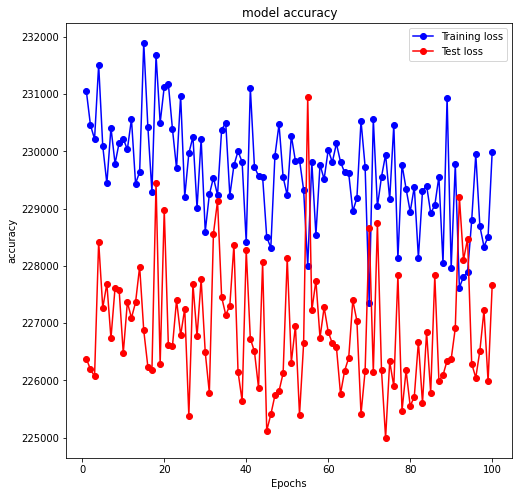

In [56]:
plt.figure(figsize=(8, 8))
history_dict_2 = history_2.history
loss_values = history_dict_2['mean_absolute_error']
val_loss_values = history_dict_2['val_mean_absolute_error']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo-', label='Training loss')
plt.plot(epochs, val_loss_values, 'ro-', label='Test loss')
plt.title('model accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

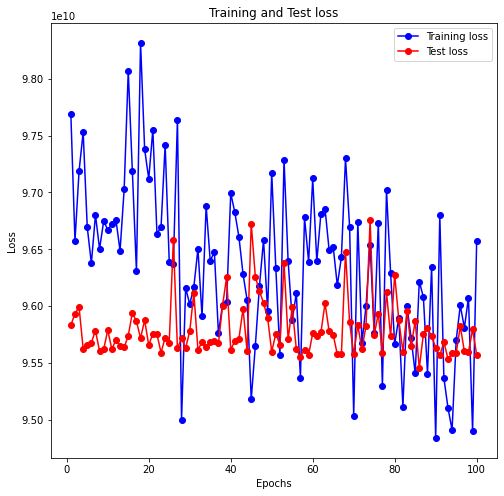

In [55]:
plt.figure(figsize=(8, 8))
history_dict_21 = history_2.history
loss_values = history_dict_21['loss']
val_loss_values = history_dict_21['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo-', label='Training loss')
plt.plot(epochs, val_loss_values, 'ro-', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [59]:
y_pred=Ladi_House.predict([np.reshape(XLadi_sample,(1,4)),np.reshape(Ladi_sample_ImR,(1,64,64,3))])  ### Casa prueba 01

In [61]:
print("\n Actual price $  ",Ladi_sample['price'].values)
print("\n Predicted price $ ",y_pred)


 Actual price $   [560000]

 Predicted price $  [[561256.44]]


In [37]:
y_pred_c2=Ladi_House.predict([np.reshape(XLadi_sample2,(1,4)),np.reshape(Ladi_sample_ImR2,(1,64,64,3))])  ### Casa prueba 02

In [38]:
print("\n Actual price $  ", (Ladi_sample2['price'].values))
print("\n Predicted price $  ",y_pred_c2)


 Actual price $   [859000]

 Predicted price $   [[879189.2]]


In [88]:
y_pred_c3=Ladi_House.predict([np.reshape(XLadi_sample3,(1,4)),np.reshape(Ladi_sample_ImR3,(1,64,64,3))])  ### Casa prueba 03

In [89]:
print("\n Actual price $  ", (Ladi_sample3['price'].values))
print("\n Predicted price $  ",y_pred_c3)


 Actual price $   [489900]

 Predicted price $   [[428402.2]]
